# Imports and aux functions

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(threshold=np.inf)
#from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder
from scipy.optimize import curve_fit
from scipy import interpolate
from keras.utils import plot_model
import IPython

2023-09-27 12:16:17.507034: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def round_to_nearest(number, lower_limit, upper_limit):
    diff_lower = abs(number - lower_limit)
    diff_upper = abs(number - upper_limit)
    
    if diff_lower < diff_upper:
        return lower_limit
    else:
        return upper_limit

def mean_squared_difference(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length")
    
    squared_differences = [(x - y) ** 2 for x, y in zip(list1, list2)]
    mean_squared_diff = sum(squared_differences) / len(list1)
    
    return mean_squared_diff

def accuracy(true_labels, predicted_labels):
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Lists must have the same length")
    
    correct_predictions = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
    total_predictions = len(true_labels)
    
    accuracy_value = correct_predictions / total_predictions
    return accuracy_value

def select_nth_elements(lists, n):
    selected_elements = [lst[n] for lst in lists]
    return selected_elements

def calculate_accuracy(predictions, values):
    sum=0
    for i in range(len(predictions)):
        if predictions[i][1]== values[i][1] and predictions[i][3] == values[i][3] and predictions[i][4] == values[i][4]:
            sum+=1
    
    accuracy=sum/len(predictions)
    return accuracy

def linear_function(x, m, b):
    return m * x + b

def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

def increase_data_points(x_original, y_original, num_new_points):

    # Generate new x-values evenly spaced between original points
    new_x_values = np.linspace(x_original[0], x_original[-1], int(len(x_original) * (num_new_points + 1)))

    # Use linear interpolation to estimate new y-values
    f = interpolate.interp1d(x_original, y_original, kind='linear')
    new_y_values = f(new_x_values)

    return new_x_values, new_y_values


# ANN to predict thickness of target (tests)

## Neural Network with 1 label

##### Data reshaping

In [ ]:
with open('./datafiles/data1.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('./datafiles/labels1.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]


Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[a],'--')
print('Blue graph: Thick:'+str(Y[a][0]))
plt.plot(xaxis,X[b],'--')
print('Orange graph: Thick:'+str(Y[b][0]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Data spliting

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(2000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(40,activation='relu'),
     keras.layers.Dense(1,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []

for i in range(len(predictions)):

    temp_thick.append(predictions[i][0] - y_test[i][0])


##### Graphs

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=10, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))

## Neural Network with 2 Labels

##### Data reshaping

In [ ]:
with open('./datafiles/data2.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('./datafiles/labels2.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]


Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[a],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1]))
plt.plot(xaxis,X[b],'--')
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Data spliting

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(2000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(2,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []


for i in range(len(predictions)):

    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)

    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])

##### Graphs

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=5, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))

## Neural Network with 3 Labels

##### Data reshaping

In [ ]:
with open('./datafiles/data3.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('./datafiles/labels3.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]


Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[a],'--')
plt.plot(xaxis,X[b],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1])+ ' Energy: '+str(Y[a][2]))
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1])+' Energy: '+str(Y[b][2]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Data spliting

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(1000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(3,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []


for i in range(len(predictions)):

    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)

    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])
    temp_energy.append(predictions[i][2] - y_test[i][2])

##### Graphs

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=5, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')

axs[1,0].hist(temp_energy, bins=20, color='yellow',alpha=0.7)
axs[1,0].set_title('Energy')
axs[1,0].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print('Energy: ')
    print('P: ' + str(predictions[i][2]) + '. R: ' + str(y_test[i][2]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))

## Neural Network with 4 Labels

##### Data reshaping

In [ ]:
with open('./datafiles/data4.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('./datafiles/labels4.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]


Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[a],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1])+ ' Energy: '+str(Y[a][2])+' Scatter angle: '+str(Y[a][3]))
plt.plot(xaxis,X[b],'--')
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1])+' Energy: '+str(Y[b][2])+' Scatter angle: '+str(Y[b][3]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Data spliting

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(1000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(4,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []

for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)
    predictions[i][3]=round_to_nearest(predictions[i][3], 140,165)

    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])
    temp_energy.append(predictions[i][2] - y_test[i][2])
    temp_angle.append(predictions[i][3] - y_test[i][3])


##### Graphs

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=5, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')

axs[1,0].hist(temp_energy, bins=20, color='yellow',alpha=0.7)
axs[1,0].set_title('Energy')
axs[1,0].set_xlabel('Predicted-Real')

axs[1, 1].hist(temp_angle, bins=5, color='red', alpha=0.7)
axs[1, 1].set_title('Angle')
axs[1, 1].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print('Energy: ')
    print('P: ' + str(predictions[i][2]) + '. R: ' + str(y_test[i][2]))
    print('Angle: ')
    print('P: ' + str(predictions[i][3]) + '. R: ' + str(y_test[i][3]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))
print(accuracy(select_nth_elements(y_test, 3),select_nth_elements(predictions, 3)))

## Neural Network with 5 Labels


##### Data reshaping

In [ ]:
#data reshaping
with open('./datafiles/data5.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    


#labels reshaping
with open('./datafiles/labels5.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)
del y[len(y)-1]


#normalize
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

#numpy list
X=np.array(Xx)
Y=np.array(y)


#spectra graph
a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(13, 7))
plt.plot(xaxis,X[a],'--')
plt.plot(xaxis,X[b],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1])+ ' Energy: '+str(Y[a][2])+' Scatter angle: '+str(Y[a][3])+' Target: '+str(Y[a][4]))
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1])+' Energy: '+str(Y[b][2])+' Scatter angle: '+str(Y[b][3])+' Target: '+str(Y[b][4]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

'''
#seperate regression from classification
y_rgrss=[]
y_clssfr=[]
for l in y:
    aux=[]
    aux.append(l[1])
    aux.append(l[3])
    aux.append(l[4])
    y_clssfr.append(aux)
    aux=[]
    aux.append(l[0])
    aux.append(l[2])
    y_rgrss.append(aux)


#numpy list
Y_rgrss=np.array(y_rgrss)
Y_clssfr=np.array(y_clssfr)
'''

##### Data spliting

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(1000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(5,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []

for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)
    predictions[i][3]=round_to_nearest(predictions[i][3], 140,165)
    predictions[i][4]=round_to_nearest(predictions[i][4], 0,1)

    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])
    temp_energy.append(predictions[i][2] - y_test[i][2])
    temp_angle.append(predictions[i][3] - y_test[i][3])
    temp_target.append(predictions[i][4] - y_test[i][4])

##### Graphs

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=5, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')

axs[1,0].hist(temp_energy, bins=20, color='yellow',alpha=0.7)
axs[1,0].set_title('Energy')
axs[1,0].set_xlabel('Predicted-Real')

axs[1, 1].hist(temp_angle, bins=5, color='red', alpha=0.7)
axs[1, 1].set_title('Angle')
axs[1, 1].set_xlabel('Predicted-Real')

axs[2, 1].hist(temp_target, bins=5, color='purple', alpha=0.7)
axs[2, 1].set_xlim(-1,1)
axs[2, 1].set_title('Target')
axs[2, 1].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
plt.hist2d(temp_energy, temp_target)
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print('Energy: ')
    print('P: ' + str(predictions[i][2]) + '. R: ' + str(y_test[i][2]))
    print('Angle: ')
    print('P: ' + str(predictions[i][3]) + '. R: ' + str(y_test[i][3]))
    print('Target: ')
    print('P: ' + str(predictions[i][4]) + '. R: ' + str(y_test[i][4]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))
print(accuracy(select_nth_elements(y_test, 3),select_nth_elements(predictions, 3)))
print(accuracy(select_nth_elements(y_test, 4),select_nth_elements(predictions, 4)))
print(calculate_accuracy(predictions,y_test))

## RNN testing (5 labels)

##### Data reshaping

In [ ]:
#data reshaping
with open('./datafiles/data5.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    


#labels reshaping
with open('./datafiles/labels5.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)
del y[len(y)-1]


#normalize
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

#numpy list
X=np.array(Xx)
Y=np.array(y)


#spectra graph
a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(13, 7))
plt.plot(xaxis,X[a],'--')
plt.plot(xaxis,X[b],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1])+ ' Energy: '+str(Y[a][2])+' Scatter angle: '+str(Y[a][3])+' Target: '+str(Y[a][4]))
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1])+' Energy: '+str(Y[b][2])+' Scatter angle: '+str(Y[b][3])+' Target: '+str(Y[b][4]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Model training

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


original_shape = X_train.shape
X_trainreshape = X_train.reshape((original_shape[0], 1, original_shape[1]))
original_shape = X_test.shape
X_testreshape = X_test.reshape((original_shape[0], 1, original_shape[1]))

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=20)
model=keras.models.Sequential(
    [keras.layers.SimpleRNN(100,input_shape=(1,1000),return_sequences=True),
    keras.layers.Dense(80,activation= 'relu'),
    keras.layers.Dense(50,activation= 'relu'),
    keras.layers.Dense(5,activation='linear')])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

plot_model(model, to_file='modelrnn.png', show_shapes=True)

epochs = 125
batch_size = 32
model.fit(X_trainreshape,y_train,epochs=epochs,batch_size=batch_size,verbose=1,callbacks=[callback])

loss, mae = model.evaluate(X_testreshape, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_testreshape)
predictions = predictions.reshape(len(y_test), 5)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []

for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)
    predictions[i][3]=round_to_nearest(predictions[i][3], 140, 165)
    predictions[i][4]=round_to_nearest(predictions[i][3], 0, 1)


    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])
    temp_energy.append(predictions[i][2] - y_test[i][2])
    temp_angle.append(predictions[i][3] - y_test[i][3])
    temp_target.append(predictions[i][4] - y_test[i][4])

##### Graphs


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=30, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')

axs[1, 0].hist(temp_angle, bins=30, color='red', alpha=0.7)
axs[1, 0].set_title('Angle')
axs[1, 0].set_xlabel('Predicted-Real')

axs[1, 1].hist(temp_target, bins=30, color='purple', alpha=0.7)
axs[1, 1].set_title('Target')
axs[1, 1].set_xlabel('Predicted-Real')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
plt.hist2d(temp_energy, temp_angle)
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print('Energy: ')
    print('P: ' + str(predictions[i][2]) + '. R: ' + str(y_test[i][2]))
    print('Angle: ')
    print('P: ' + str(predictions[i][3]) + '. R: ' + str(y_test[i][3]))
    print('Target: ')
    print('P: ' + str(predictions[i][4]) + '. R: ' + str(y_test[i][4]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))
print(accuracy(select_nth_elements(y_test, 3),select_nth_elements(predictions, 3)))
print(accuracy(select_nth_elements(y_test, 4),select_nth_elements(predictions, 4)))
print(calculate_accuracy(predictions,y_test))

## Combined regression and classification (3 labels)

#### Experimental data treatment

##### Lead targets

In [ ]:
with open('./RBS_Runs/2022_23Nov_Pb/1122/alfas/dataRBS1.dat', 'r') as file:
    input_string = file.read()
lines2 = input_string.split('\n')
test_x = []
for line in lines2:
    values = line.split()
    float_values = [float(value) for value in values]
    test_x.append(float_values)

del test_x[len(test_x)-1]


print(len(test_x))
point=[]
for j in range(len(test_x)):
    for i in range(len(test_x[j])+2):
        if test_x[j][i]>test_x[j][i+1]:
            point.append(i)
            test_x[j]=test_x[j][point[j]:]
            break

for j in range(len(test_x)):
    noise=np.arange(0,250)
    params, covariance = curve_fit(quadratic_function, noise, test_x[j][0:250])
    fitted_values = quadratic_function(noise,*params)
    test_x[j][0:250] = test_x[j][0:250] - (fitted_values)

for j in range(len(test_x)):
    for i in range(point[j]):
        test_x[j].insert(0,0)


calibration_factor = 2.36
num_new_points = 1.36

for j in range(len(test_x)):
    xaxis=np.arange(len(test_x[j]))
    newx = [x * calibration_factor for x in xaxis]
    newx, test_x[j] = increase_data_points(newx, test_x[j], num_new_points)

# for j in range(len(test_x)):    
#     test_x[j]=test_x[j][90:]
    
for j in range(len(test_x)):
    size=len(test_x[j])
    while size<2800:
        test_x[j]=np.append(test_x[j],0)
        size+=1

for j in range(len(test_x)):
    for i in range(500):   
        test_x[j][i]=0
    
for j in range(len(test_x)):    
    for i in range(len(test_x[j])):
        if test_x[j][i]<0:
            test_x[j][i]=0

Xx=[]
for array in test_x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)
'''
for array in test_x:
    mean=np.mean(array)
    std=np.std(array)
    new_array=(array-mean)/std
    Xx.append(new_array)
'''

test_x=np.array(Xx)
newx=np.arange(0,len(test_x[0]))
fig = plt.figure(figsize =(10, 5))
# for i in test_x:
#     plt.plot(newx,i,'--')
plt.plot(newx,test_x[1],'--')
plt.show()

##### Gold targets

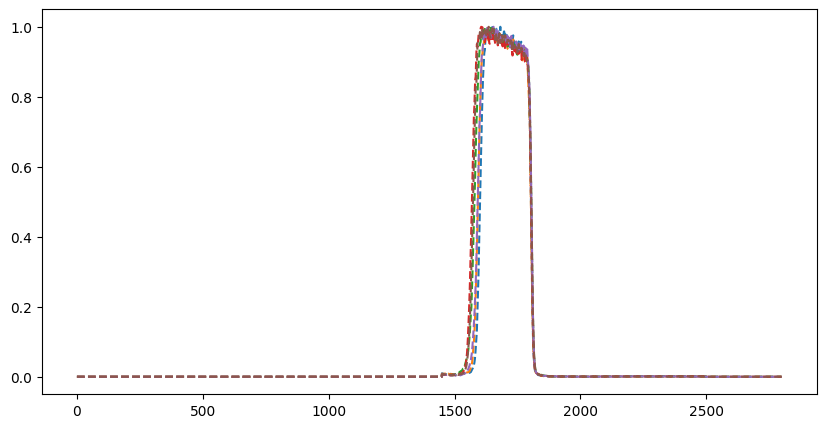

In [27]:
with open('./RBS_Runs/2022_07Set_Au&Pb&C/20220907/labelsRBS1.dat', 'r') as file:
    input_string = file.read()
lines2 = input_string.split('\n')
test_y = []
for line in lines2:
    values = line.split()
    float_values = [value for value in values]
    test_y.append(float_values)

del test_y[len(test_y)-1]


with open('./RBS_Runs/2022_07Set_Au&Pb&C/20220907/dataRBS1.dat', 'r') as file:
    input_string = file.read()
lines2 = input_string.split('\n')
test_x = []
for line in lines2:
    values = line.split()
    float_values = [float(value) for value in values]
    test_x.append(float_values)

del test_x[len(test_x)-1]

point=[]
for j in range(len(test_x)):
    for i in range(len(test_x[j])+2):
        if test_x[j][i]>test_x[j][i+1]:
            point.append(i)
            test_x[j]=test_x[j][point[j]:]
            break


for j in range(len(test_x)):
    for i in range(point[j]):
        test_x[j].insert(0,0)


calibration_factor = 2.44
num_new_points = 1.44

for j in range(len(test_x)):
    xaxis=np.arange(len(test_x[j]))
    newx = [x * calibration_factor for x in xaxis]
    newx, test_x[j] = increase_data_points(newx, test_x[j], num_new_points)


for j in range(len(test_x)):
    for i in range(1450):   
        test_x[j][i]=0


for j in range(len(test_x)):
    size=len(test_x[j])
    while size<2800:
        test_x[j]=np.append(test_x[j],0)
        size+=1
    
    
for j in range(len(test_x)):    
    for i in range(len(test_x[j])):
        if test_x[j][i]<0:
            test_x[j][i]=0

Xx=[]
for array in test_x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

test_x=np.array(Xx)
newx=np.arange(0,len(test_x[0]))
fig = plt.figure(figsize =(10, 5))
for i in test_x:
    plt.plot(newx,i,'--')
plt.show()


#seperate regression from classification
test_y_rgrss=[]
test_y_clssfr=[]
for l in test_y:
    aux=[]
    aux.append(l[2])
    test_y_clssfr.append(aux)
    aux=[]
    aux.append(float(l[0]))
    aux.append(float(l[1]))
    test_y_rgrss.append(aux)


#numpy list
test_Y_rgrss=np.array(test_y_rgrss)
test_Y_clssfr=np.array(test_y_clssfr)

#### Simulated data treatment

In [6]:
with open('./datafiles/datatest2.txt', 'r') as file:
    input_string = file.read()
lines1 = input_string.split('\n')

with open('./datafiles/labelstest2.txt', 'r') as file:
    input_string = file.read()
lines2 = input_string.split('\n')

x = []
for line in lines1:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

y = []
for line in lines2:
    values = line.split()
    float_values = [value for value in values]
    y.append(float_values)
del y[len(y)-1]

#data normalization
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)
'''
for array in x:
    mean=np.mean(array)
    std=np.std(array)
    new_array=(array-mean)/std
    Xx.append(new_array)
'''

#numpy list
X=np.array(Xx)
Y=np.array(y)

#seperate regression from classification
y_rgrss=[]
y_clssfr=[]
for l in y:
    aux=[]
    aux.append(l[2])
    y_clssfr.append(aux)
    aux=[]
    aux.append(float(l[0]))
    aux.append(float(l[1]))
    y_rgrss.append(aux)


#numpy list
Y_rgrss=np.array(y_rgrss)
Y_clssfr=np.array(y_clssfr)

Blue graph: Thick Layer1 : 935.4702736862175 // Thick Layer2 : 0 // Target : Au
Orange graph: Thick Layer1 : 1731.226375550769 // Thick Layer2 : 0 // Target : Sn


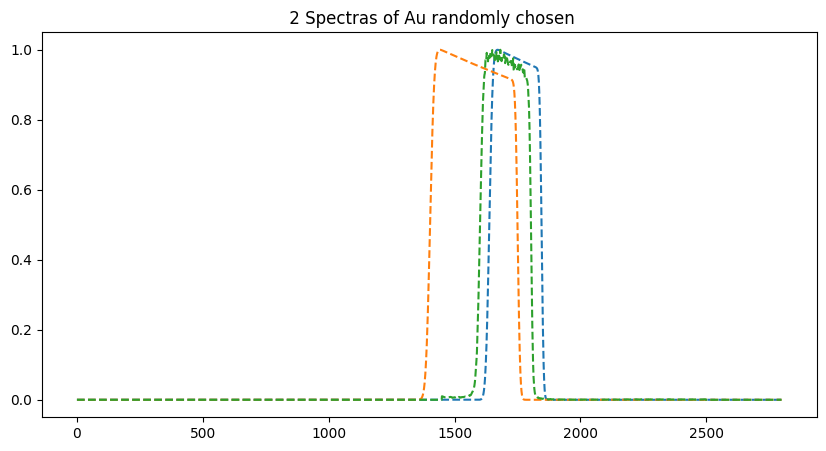

9442 5873


In [22]:
#spectra graph
a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))

fig = plt.figure(figsize =(10, 5))
plt.plot(xaxis,X[a],'--')
plt.plot(xaxis,X[b],'--')
plt.plot(newx,test_x[0],'--')
print('Blue graph: Thick Layer1 : '+str(Y[a][0])+ ' // Thick Layer2 : '+str(Y[a][1])+ ' // Target : '+str(Y[a][2]))
print('Orange graph: Thick Layer1 : '+str(Y[b][0])+ ' // Thick Layer2 : '+str(Y[b][1])+ ' // Target : '+str(Y[b][2]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()
print(a,b)

ValueError: x and y must have same first dimension, but have shapes (1024,) and (2800,)

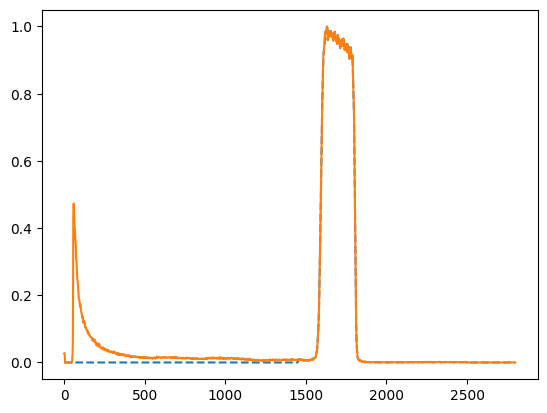

In [28]:
with open('./RBS_Runs/2022_07Set_Au&Pb&C/20220907/labelsRBS1.dat', 'r') as file:
    input_string = file.read()
lines2 = input_string.split('\n')
test_y = []
for line in lines2:
    values = line.split()
    float_values = [value for value in values]
    test_y.append(float_values)

del test_y[len(test_y)-1]


with open('./RBS_Runs/2022_07Set_Au&Pb&C/20220907/dataRBS1.dat', 'r') as file:
    input_string = file.read()
lines2 = input_string.split('\n')
testtest = []
for line in lines2:
    values = line.split()
    float_values = [float(value) for value in values]
    testtest.append(float_values)

del testtest[len(testtest)-1]

calibration_factor = 2.44
num_new_points = 1.44

for j in range(len(testtest)):
    axisx=np.arange(len(testtest[j]))
    newx = [x * calibration_factor for x in axisx]
    newx, testtest[j] = increase_data_points(newx, testtest[j], num_new_points)


for j in range(len(testtest)):
    size=len(testtest[j])
    while size<2800:
        testtest[j]=np.append(testtest[j],0)
        size+=1
    

Xx=[]
for array in testtest:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

testtest=np.array(Xx)
newx=np.arange(0,len(testtest[0]))

plt.plot(newx,test_x[1],'--')
plt.plot(newx,testtest[1])
plt.plot(xaxis,X[9442])


#### Data splitting

In [146]:
random_state=np.random.randint(0,500)
X_train,X_test,y_train,y_test,y_trainclssfr,y_testclssfr=train_test_split(X,Y_rgrss,Y_clssfr,test_size=0.05,random_state=random_state)
encoder = OneHotEncoder(sparse_output=False)
y_trainclssfr= encoder.fit_transform(y_trainclssfr.reshape(-1,1))
y_testclssfr= encoder.fit_transform(y_testclssfr.reshape(-1,1))
# Au CCaF Pb Sn SnAl

#### Model training #1

In [222]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
input_layer = keras.Input(shape=(2800,), name="input_layer")
dense_1 = keras.layers.Dense(80, activation = 'relu', name = 'hidden_1')(input_layer)
dense_2 = keras.layers.Dense(40, activation = 'relu', name = 'hidden_2')(dense_1)
dense_3 = keras.layers.Dense(20, activation = 'relu', name = 'hidden_3')(dense_2)
dense_4 = keras.layers.Dense(5, activation = 'relu', name = 'hidden_4')(dense_3)
regression_output = keras.layers.Dense(2, activation = 'linear', name = 'regression_output')(dense_4)
classification_output = keras.layers.Dense(5, activation = 'softmax', name = 'classification_output')(dense_4)
model1 = keras.Model(inputs=input_layer,outputs=[regression_output, classification_output])
    

model1.compile(
    loss=['mse','categorical_crossentropy'], optimizer='adam', metrics=['mae']
)

keras.utils.plot_model(model1, to_file='test_keras_plot_model.png', show_shapes=True, show_layer_activations=True)
IPython.display.Image('test_keras_plot_model.png')

epochs = 100
batch_size = 64
#model.summary()
history = model1.fit(X_train,
        {"regression_output": y_train, "classification_output": y_trainclssfr},
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[callback],
        verbose=1)

predictions11,predictions21=model1.predict(X_test)
temp_part1, temp_thick11, temp_thick21 = [], [], []


for i in range(len(predictions11)):
    if predictions11[i][1]<0:
        predictions11[i][1] = 0
    temp_thick11.append(abs((predictions11[i][0] - y_test[i][0])*(100/y_test[i][0])))
    if y_test[i][1]==0:
        temp_thick21.append(0)
    else:
        temp_thick21.append(abs((predictions11[i][1] - y_test[i][1])*(100/y_test[i][1])))
    if (np.argmax(predictions21[i]) - np.argmax(y_testclssfr[i]))==0:
        temp_part1.append(True)
    else:
        temp_part1.append(False)

16/16 [==============================] - 0s 2ms/step


In [223]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
input_layer = keras.Input(shape=(2800,), name="input_layer")
dense_1 = keras.layers.Dense(80, activation = 'relu', name = 'hidden_1')(input_layer)
dense_2 = keras.layers.Dense(40, activation = 'relu', name = 'hidden_2')(dense_1)
regression_output = keras.layers.Dense(2, activation = 'linear', name = 'regression_output')(dense_2)
classification_output = keras.layers.Dense(5, activation = 'softmax', name = 'classification_output')(dense_2)
model2 = keras.Model(inputs=input_layer,outputs=[regression_output, classification_output])
    

model2.compile(
    loss=['mse','categorical_crossentropy'], optimizer='adam', metrics=['mae']
)

# keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True, show_layer_activations=True)
# IPython.display.Image('test_keras_plot_model.png')

epochs = 100
batch_size = 64
#model.summary()
history1 = model2.fit(X_train,
        {"regression_output": y_train, "classification_output": y_trainclssfr},
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[callback],
        verbose=1)

predictions12,predictions22=model2.predict(X_test)
temp_part2, temp_thick12, temp_thick22 = [], [], []


for i in range(len(predictions12)):
    if predictions12[i][1]<0:
        predictions12[i][1] = 0
    temp_thick12.append(abs((predictions12[i][0] - y_test[i][0])*(100/y_test[i][0])))
    if y_test[i][1]==0:
        temp_thick22.append(0)
    else:
        temp_thick22.append(abs((predictions12[i][1] - y_test[i][1])*(100/y_test[i][1])))
    if (np.argmax(predictions22[i]) - np.argmax(y_testclssfr[i]))==0:
        temp_part2.append(True)
    else:
        temp_part2.append(False)

16/16 [==============================] - 0s 2ms/step


In [224]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
input_layer = keras.Input(shape=(2800,), name="input_layer")
dense_1 = keras.layers.Dense(80, activation = 'relu', name = 'hidden_1')(input_layer)
dense_2 = keras.layers.Dense(40, activation = 'relu', name = 'hidden_2')(dense_1)
dense_3 = keras.layers.Dense(20, activation = 'relu', name = 'hidden_3')(dense_2)
regression_output = keras.layers.Dense(2, activation = 'linear', name = 'regression_output')(dense_3)
classification_output = keras.layers.Dense(5, activation = 'softmax', name = 'classification_output')(dense_3)
model3 = keras.Model(inputs=input_layer,outputs=[regression_output, classification_output])
    

model3.compile(
    loss=['mse','categorical_crossentropy'], optimizer='adam', metrics=['mae']
)

keras.utils.plot_model(model3, to_file='test_keras_plot_model.png', show_shapes=True, show_layer_activations=True)
IPython.display.Image('test_keras_plot_model.png')

epochs = 100
batch_size = 64
#model.summary()
history2 = model3.fit(X_train,
        {"regression_output": y_train, "classification_output": y_trainclssfr},
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[callback],
        verbose=1)

predictions13,predictions23=model3.predict(X_test)
temp_part3, temp_thick13, temp_thick23 = [], [], []


for i in range(len(predictions13)):
    if predictions13[i][1]<0:
        predictions13[i][1] = 0
    temp_thick13.append(abs((predictions13[i][0] - y_test[i][0])*(100/y_test[i][0])))
    if y_test[i][1]==0:
        temp_thick23.append(0)
    else:
        temp_thick23.append(abs((predictions13[i][1] - y_test[i][1])*(100/y_test[i][1])))
    if (np.argmax(predictions23[i]) - np.argmax(y_testclssfr[i]))==0:
        temp_part3.append(True)
    else:
        temp_part3.append(False)

16/16 [==============================] - 0s 2ms/step


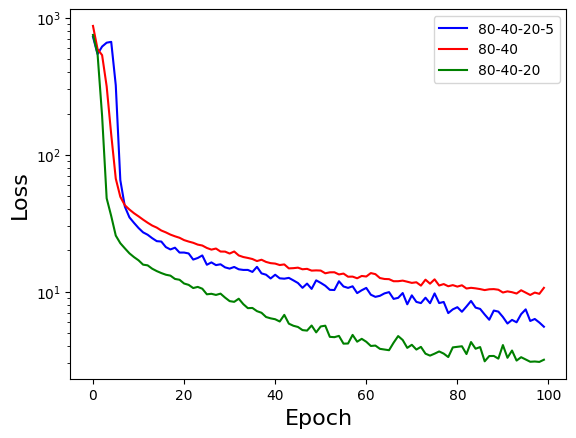

In [196]:
plt.plot(history.history['regression_output_mae'],color='blue')
plt.plot(history1.history['regression_output_mae'],color='red')
plt.plot(history2.history['regression_output_mae'],color='green')
plt.yscale('log')
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.legend(['80-40-20-5', '80-40','80-40-20'], loc='upper right')
plt.show()

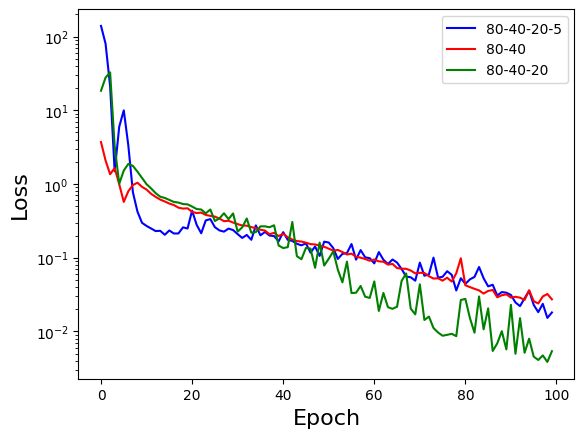

In [197]:
plt.plot(history.history['classification_output_loss'],color='blue')
plt.plot(history1.history['classification_output_loss'],color='red')
plt.plot(history2.history['classification_output_loss'],color='green')
plt.yscale('log')
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.legend(['80-40-20-5', '80-40','80-40-20'], loc='upper right')
plt.show()

##### Graphs

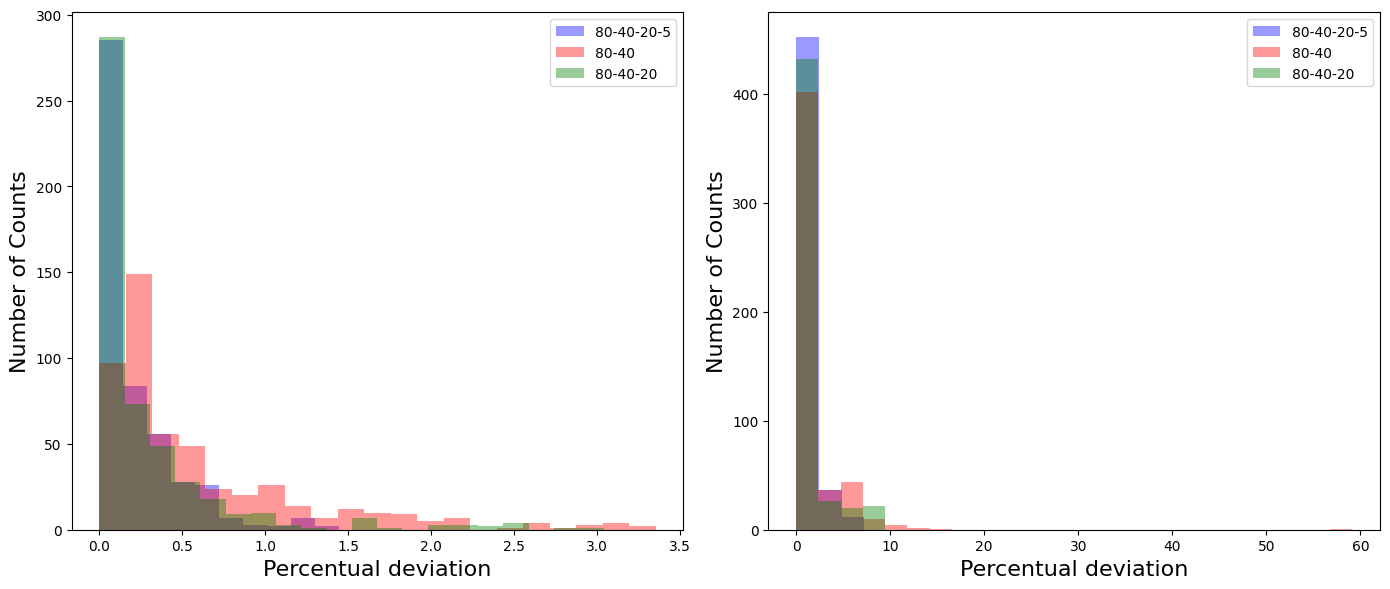

In [199]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].hist(temp_thick11, bins=10, color='blue', alpha=0.4)
axs[0].hist(temp_thick12, bins=21, color='red', alpha=0.4)
axs[0].hist(temp_thick13, bins=20, color='green', alpha=0.4)
axs[0].set_xlabel('Percentual deviation',fontsize=16)
axs[0].set_ylabel('Number of Counts',fontsize=16)

axs[0].legend(['80-40-20-5', '80-40','80-40-20'], loc='upper right')

axs[1].hist(temp_thick21, bins=3, color='blue', alpha=0.4)
axs[1].hist(temp_thick22, bins=25, color='red', alpha=0.4)
axs[1].hist(temp_thick23, bins=4, color='green', alpha=0.4)
axs[1].set_xlabel('Percentual deviation',fontsize=16)
axs[1].set_ylabel('Number of Counts',fontsize=16)


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
plt.legend(['80-40-20-5', '80-40','80-40-20'], loc='upper right')
# Show the plot
plt.show()

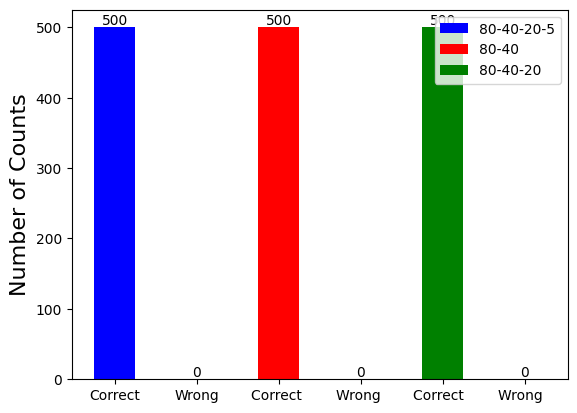

In [228]:
true_count=temp_part1.count(True)
false_count=temp_part1.count(False)

labels=['Correct','Wrong']
counts=[true_count, false_count]

plt.bar(labels,counts,width=0.50,color='blue',alpha=1)
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

true_count=temp_part2.count(True)
false_count=temp_part2.count(False)

labels=['Correct ','Wrong ']
counts=[true_count, false_count]

for i, count in enumerate(counts):
    plt.text(i+2, count + 0.1, str(count), ha='center', va='bottom')
plt.bar(labels,counts,width=0.50,color='red',alpha=1)


true_count=temp_part3.count(True)
false_count=temp_part3.count(False)

labels=['Correct  ','Wrong  ']
counts=[true_count, false_count]

plt.bar(labels,counts,width=0.50,color='green',alpha=1)
for i, count in enumerate(counts):
    plt.text(i+4, count + 0.1, str(count), ha='center', va='bottom')


plt.ylabel('Number of Counts',fontsize=16)
plt.legend(['80-40-20-5', '80-40','80-40-20'], loc='upper right')
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions1)):

    print('Target '+str(i+1)+' :')
    print('Thickness (Layer 1): ')
    print('P: ' + str(predictions1[i][0]) + '.\nR: ' + str(y_test[i][0]))
    print('Thickness (Layer 2): ')
    print('P: ' + str(predictions1[i][1]) + '.\nR: ' + str(y_test[i][1]))
    print('Target: ')
    print('P: ' + str(np.argmax(predictions2[i])) + '.\nR: ' + str(np.argmax(y_testclssfr[i])))
    print()
    print()

#### Experimental test

In [205]:
test_Y_clssfr= encoder.fit_transform(test_Y_clssfr.reshape(-1,1))

predictions1,predictions2=model1.predict(test_x)
temp_part1, temp_thick11, temp_thick21 = [], [], []

for i in range(len(predictions1)):
    if predictions1[i][1]<0:
        predictions1[i][1] = 0
    temp_thick11.append(abs((predictions1[i][0] - test_Y_rgrss[i][0])*(100/test_Y_rgrss[i][0])))
    if test_Y_rgrss[i][1]==0:
        temp_thick21.append(0)
    else:
        temp_thick21.append(abs((predictions1[i][1] - test_Y_rgrss[i][1])*(100/test_Y_rgrss[i][1])))
    if (np.argmax(predictions2[i]) - np.argmax(test_Y_clssfr[i]))==0:
        temp_part1.append(True)
    else:
        temp_part1.append(False)

        test_Y_clssfr= encoder.fit_transform(test_Y_clssfr.reshape(-1,1))

predictions1,predictions2=model2.predict(test_x)
temp_part2, temp_thick12, temp_thick22 = [], [], []

for i in range(len(predictions1)):
    if predictions1[i][1]<0:
        predictions1[i][1] = 0
    temp_thick12.append(abs((predictions1[i][0] - test_Y_rgrss[i][0])*(100/test_Y_rgrss[i][0])))
    if test_Y_rgrss[i][1]==0:
        temp_thick22.append(0)
    else:
        temp_thick22.append(abs((predictions1[i][1] - test_Y_rgrss[i][1])*(100/test_Y_rgrss[i][1])))
    if (np.argmax(predictions2[i]) - np.argmax(test_Y_clssfr[i]))==0:
        temp_part2.append(True)
    else:
        temp_part2.append(False)

predictions1,predictions2=model3.predict(test_x)
temp_part3, temp_thick13, temp_thick23 = [], [], []

for i in range(len(predictions1)):
    if predictions1[i][1]<0:
        predictions1[i][1] = 0
    temp_thick13.append(abs((predictions1[i][0] - test_Y_rgrss[i][0])*(100/test_Y_rgrss[i][0])))
    if test_Y_rgrss[i][1]==0:
        temp_thick23.append(0)
    else:
        temp_thick23.append(abs((predictions1[i][1] - test_Y_rgrss[i][1])*(100/test_Y_rgrss[i][1])))
    if (np.argmax(predictions2[i]) - np.argmax(test_Y_clssfr[i]))==0:
        temp_part3.append(True)
    else:
        temp_part3.append(False)

1/1 [==============================] - 0s 25ms/step


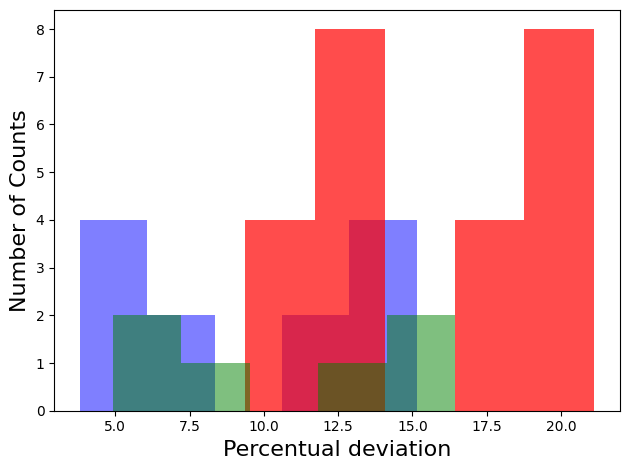

In [216]:
plt.hist(temp_thick11*2, bins=5, color='blue', alpha=0.5)
plt.hist(temp_thick12*4, bins=5, color='red', alpha=0.7)
plt.hist(temp_thick13, bins=5, color='green', alpha=0.5)
plt.xlabel('Percentual deviation',fontsize=16)
plt.ylabel('Number of Counts',fontsize=16)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Number of Counts')

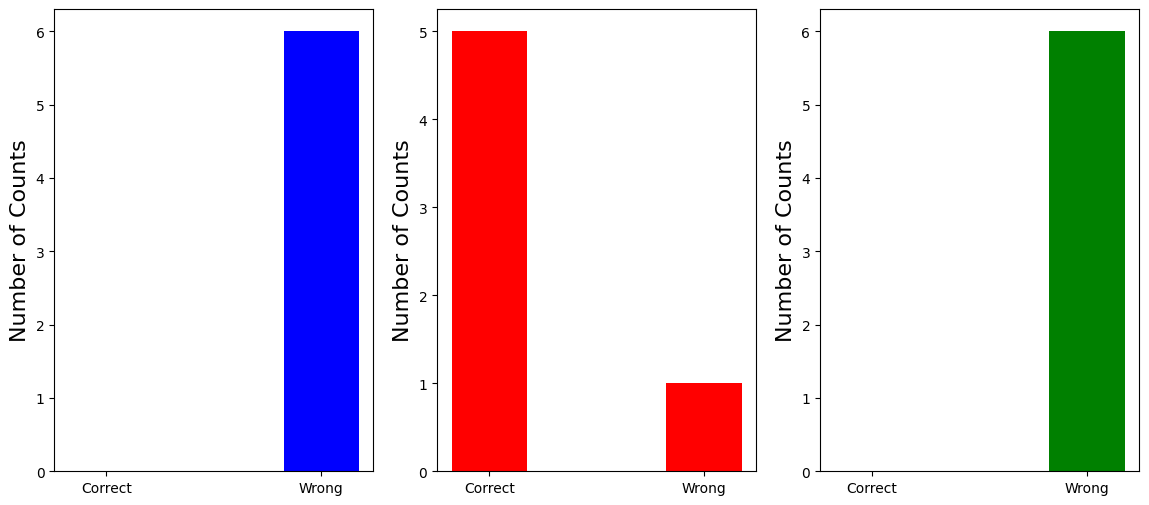

In [220]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

true_count=temp_part1.count(True)
false_count=temp_part1.count(False)

labels=['Correct','Wrong']
counts=[true_count, false_count]

axs[0].bar(labels,counts,width=0.35,color='blue',alpha=1)
axs[0].set_ylabel('Number of Counts',fontsize=16)

true_count=temp_part2.count(True)
false_count=temp_part2.count(False)

labels=['Correct','Wrong']
counts=[true_count, false_count]

axs[1].bar(labels,counts,width=0.35,color='red',alpha=1)
axs[1].set_ylabel('Number of Counts',fontsize=16)
true_count=temp_part3.count(True)
false_count=temp_part3.count(False)

labels=['Correct','Wrong']
counts=[true_count, false_count]

axs[2].bar(labels,counts,width=0.35,color='green',alpha=1)

plt.ylabel('Number of Counts',fontsize=16)

# for i, count in enumerate(counts):
#     plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

In [ ]:
for i in range(len(predictions1)):

    print('Target '+str(i+1)+' :')
    print('Thickness (Layer 1): ')
    print('P: ' + str(predictions1[i][0]) + '.\nR: ' + str(test_Y_rgrss[i][0]))
    print('Thickness (Layer 2): ')
    print('P: ' + str(predictions1[i][1]) + '.\nR: ' + str(test_Y_rgrss[i][1]))
    print('Target: ')
    print('P: ' + str(np.argmax(predictions2[i])) + '.\nR: ' + str(np.argmax(test_Y_clssfr[i])))
    print()
    print()